In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split as tt
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
Data Preprocessing

In [5]:
# c = list(df.columns)
# y = []
# g = []
# for i in range(len(c)):
#     if df[c[i]].dtype == "object":
#         g.append(c[i])
#         l = df[c[i]].unique()
#         y.append(l)
#
# # Label Mapping - To convert categorical inputs to numerical values
# for i in range(len(y)):
#     for j in range(len(y[i])):
#         df.replace({g[i]:{y[i][j]:j}},inplace=True)

# Replacing values
df.replace({"sex":{"male":1,"female":0},
            "smoker":{"yes":1,"no":0},
            "region":{"southwest":3,"southeast":2,"northwest":1,"northeast":0}},inplace=True)


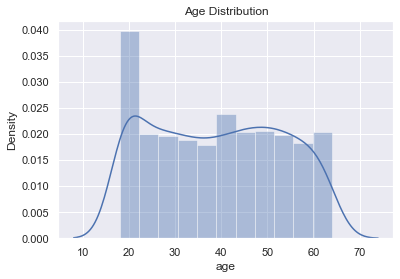

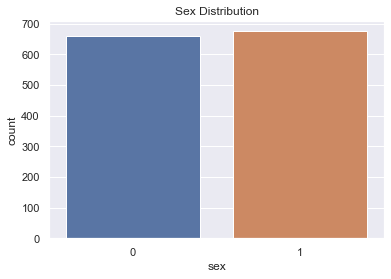

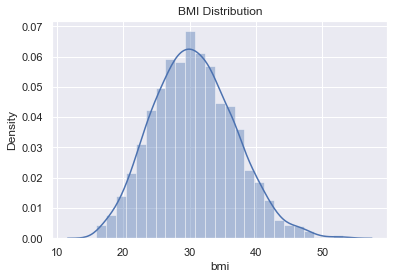

In [4]:
# Distribution of age
sns.set()
sns.distplot(df["age"])
plt.title("Age Distribution")
plt.show()

# Distribution of sex
sns.set()
sns.countplot(df["sex"])
plt.title("Sex Distribution")
plt.show()

# Distribution of bmi
sns.set()
sns.distplot(df["bmi"])
plt.title("BMI Distribution")
plt.show()

In [6]:
m = df.drop(["charges"],axis=1)
n = df["charges"]

m_train,m_test,n_train,n_test = tt(m,n,train_size=0.78,random_state=0)

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(m_train,n_train)

n_train_pred = lin_reg.predict(m_train)
n_test_pred = lin_reg.predict(m_test)

In [8]:
error_train = r2_score(n_train,n_train_pred)
error_test = r2_score(n_test,n_test_pred)
print("Training Data Accuracy:",error_train)
print("Testing Data Accuracy:",error_test)

Training Data Accuracy: 0.7331052774798162
Testing Data Accuracy: 0.8047865786378768


In [9]:
ip = np.array((32,1,28.88,0,0,1))
ip = ip.reshape(1,-1)
pred = lin_reg.predict(ip)
print("Predicted Charges:",pred)

Predicted Charges: [5673.42277]
